## MatplotLib

In [8]:
import numpy as np
import matplotlib.pyplot as plt

f1 = plt.figure(figsize=(10,4), dpi=100) # f1 servira dans la cellule suivante
plt.title(u"Prix de l'eau au détail") # Titre en Unicode pour avoir les accents
plt.xlabel('en tonne')
plt.grid()

Une courbe est simplement une succession de segments. Si vous en mettez plus qu'il n'y a de pixel sur votre écran, c'est gacher.

Puisque c'est une succession de segments, on les représentent par une liste de point soit un tableau des coordonnées x des points et le tableau des coordonnées y.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,1,0.1) # de 0 à 1 exclu avec un écart de 0.1
# plt.plot(x, x**2, label=u"x²")
plt.plot(x, x**2)  # avec des ronds (o) rouge (r) à la place des segments
plt.show()
# plt.plot(x, np.sqrt(x), '--g', label=r"$\sqrt{x}$") # r pour raw text ce qui permet le LaTeX
#print x**2


On utilise arange (de NumPy) et non range (fonction de base de Python) car arange sait appliquer des opérations mathématiques à chacun de ses éléments.



#### Courbe avec annotations

On peut faire des figures très riches avec des annotations (cf <a href="http://matplotlib.org/users/annotations_guide.html">ici</a> pour des explications
complètes).

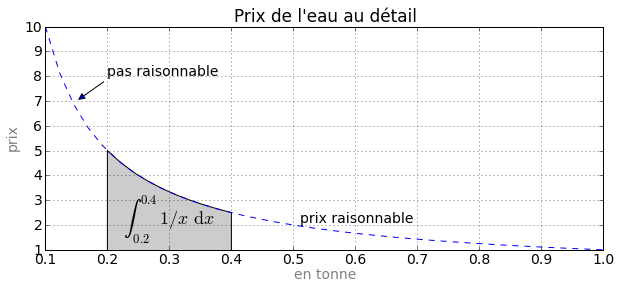

In [104]:
f1 = figure(figsize=(10,4), dpi=100) # f1 servira dans la cellule suivante
title(u"Prix de l'eau au détail") # Titre en Unicode pour avoir les accents
xlabel('en tonne')
ylabel('prix')
grid()


x = linspace(0.1, 1, 40) # linspace est pratique pour définir un maillage régulier d'un interval
plot(x, 1./x, '--')

# ajoutopns un polygone grisé
ix = linspace(0.2, 0.4, 10)
iy = 1 / ix
poly = Polygon([(0.2,0)] + list(zip(ix,iy)) + [(0.4,0)], facecolor='0.8', edgecolor='k')
ax = subplot(111)  # nécessaire pour attacher un polygone et une annotation, cf explications à l'exemple 3D ci-desssous
ax.add_patch(poly)

# ajoutons du texte, du LaTeX et une flèche
text(0.51, 2.1, "prix raisonnable")
text(0.3, 2, r"$\int_{0.2}^{0.4} 1/x \, \mathrm{d}x$", horizontalalignment='center',size=18)
ax.annotate("pas raisonnable", xy=(0.15,7), xytext=(0.2,8), arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3", relpos=(0,0)))


#### Sauver ses figures dans un fichier PDF

In [105]:
# imprimons notre courbe dans un fichier PDF
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('/tmp/foo.pdf')
pp.savefig(f1)
pp.close()

In [106]:
!ls -l /tmp/*.pdf

-rw-rw-r-- 1 ipython ipython 13604 nov.  29 13:05 foo.pdf


#### Courbe 3D

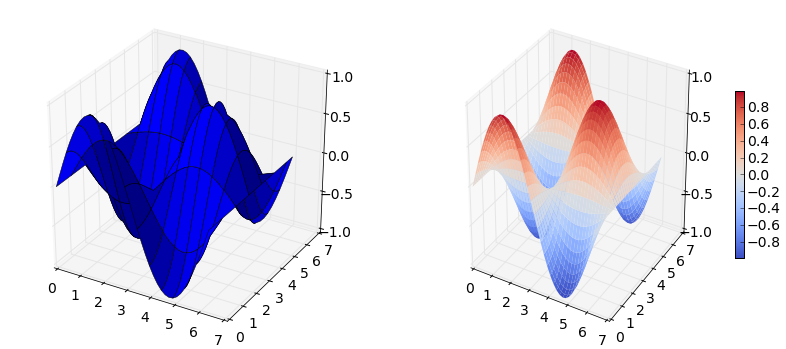

In [107]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14,6))

phi_m = linspace(0, 2*pi, 40)
phi_p = linspace(0, 2*pi, 40)
X,Y = meshgrid(phi_p, phi_m)
Z = sin(X)*cos(Y)

# On définit le premier sous-dessin avec subplot, sous-dessin en 3D
# Arguments de subplot : nb lignes, nb colonne, numéro de la case
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=6, cstride=3, linewidth=0.5)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
cb = fig.colorbar(p, shrink=0.5) # la légende des couleurs

#### Un exemple avec deux échelles et deux types de présentation

Une courbe avec des dates en ordonnée, à gauche le nombre d'utilisateur de PayPal sous forme de courbes, à droite le CA sous forme de barres :

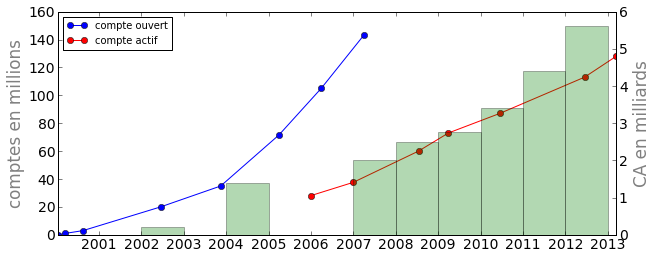

In [108]:
import matplotlib.dates as dates
dates.DateFormatter('%d/%m/%Y')

comptes = {'15/01/00':0.1, '15/03/00':1, '15/08/00':3, '15/06/02':20, '15/11/03':35, '31/03/05':71.6, '31/03/07':143, '30/03/06':105}
new_comptes = {dates.datestr2num(i):comptes[i] for i in comptes.keys()} # on convertit les dates
anc = new_comptes.keys()
anc.sort()

actifs = {'31/12/05':28.1, '31/12/06':37.6, '15/07/08':60, '30/03/09':73, '15/06/10':87, '15/06/12':113, '15/03/13':128}
new_actifs = {dates.datestr2num(i):actifs[i] for i in actifs.keys()} # on convertit les dates
ana = new_actifs.keys()
ana.sort()

ca = {'1/1/12':5.6, '1/1/11':4.4, '1/1/10':3.4, '1/1/09':2.76, '1/1/08':2.5, '1/1/07':2., '1/1/04':1.4, '1/1/02':.2}
new_ca = {dates.datestr2num(i):ca[i] for i in ca.keys()} # on convertit les dates
anca = new_ca.keys()
anca.sort()

f1 = figure(figsize=(10,4), dpi=100)
ax1 = f1.add_subplot(111)
ax2 = ax1.twinx() # pour mettre la légende sur le coté droit
ax1.set_ylabel('comptes en millions',fontsize='large')
ax2.set_ylabel('CA en milliards', fontsize='large')

ax2.bar(anca,[new_ca[i] for i in anca],width=anca[-1]-anca[-2],color='g', alpha=0.3, label="CA") # barres
ax1.plot_date(anc,[new_comptes[i] for i in anc],'b-o', label="compte ouvert")
ax1.plot_date(ana,[new_actifs[i] for i in ana],'r-o', label="compte actif")

rcParams['legend.loc'] = 'upper left' # choix manuel de l'emplacement de la légende
rcParams.update({'font.size': 14})
ax1.legend()

### Copier les autres c'est plus facile

<a href="http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb">Le tutorial de J.R. Johansson</a> est une bonne source pour tout savoir sur les courbes de bases que l'on vient de voir.

La bibliothèque MathplotLib propose aussi <a href="http://matplotlib.org/gallery.html">une gallerie d'exemples</a> qui permet de trouver facilement le type de courbe que l'on désire faire et de comprendre comment faire. Voici une <a href="http://www.loria.fr/~rougier/coding/gallery">autre gallerie</a> plus courte
mais plus didactique.

#### Exemple 3D (recopié de la gallerie)

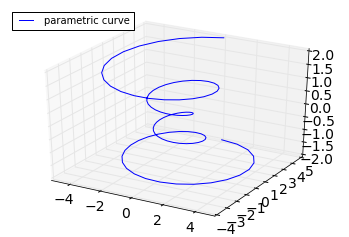

In [109]:

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

Dans cet exemple on a laissé tous les import avec leurs alias. Cela permet de bien voir d'où vient chaque fonction.

#### Exercice

Prendre une des courbes de la gallerie, la recopier ici et la modifier.

#### ggplot

Il faut admettre que faire des jolies courbes peut être laborieux. Les afficionados du langage R qui utilisent ggplot trouvent
que leur logiciel de tracer est nettement mieux. C'est pour cette raison qu'il est porté sur Python : 
cf <a href="https://pypi.python.org/pypi/ggplot">la page de ggplot pour Python<a/> et <a href="http://blog.yhathq.com/posts/ggplot-for-python.html">le blog</a>
avec des exemples. 

Attention, c'est encore neuf, donc vérifiez qu'il y a bien ce dont vous avez besoin si pour décider d'opter pour ggplot.